In [5]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import numpy as np
from PIL import Image

# load latest clean data file
clean_data = pd.read_csv('clean_data_ver3.csv')

# load mask for word cloud
cloud_mask = np.array(Image.open("cloud-mask.png"))

# add to STOPWORDS list
stop_words = set(STOPWORDS)
stop_words.update(["Python SQL", "SQL Python"])

clean_data.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,job_title,category,company_name,url,city,state,country,job_description,job_type,salary_offered,job_board,extracted_job_board,job_skills
0,0,0,0,data scientist,Accounting/Finance,Farmers Insurance Group,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Woodland Hills,CA,Usa,Read what people are saying about working here...,Undefined,NaN,indeed,indeed,"R, R, R, R, Python, PowerBI, Tableau, Qlik..."
1,1,1,1,data scientist,NaN,Luxoft USA Inc,https://www.dice.com/jobs/detail/Data-Scientis...,Middletown,NJ,Usa,We have an immediate opening for a Sharp Data ...,Undefined,NaN,dice,dice,"Python, SQL, Python, Algorithms, R, R, Pytho..."
2,2,2,2,data scientist,NaN,Cincinnati Bell Technology Solutions,https://www.dice.com/jobs/detail/Data-Scientis...,New York,NY,Usa,Candidates should have the following backgroun...,Full Time,NaN,dice,dice,"Scala, Spark, Hadoop, Big Data, Spark, Scala, ML"
3,3,3,6,data scientist,Accounting/Finance,Spotify,https://www.indeed.com/viewjob?jk=c6db96b37f8a...,New York,NY,Usa,Read what people are saying about working here...,Undefined,NaN,indeed,indeed,"SQL, R, Tableau, Python, Scala"
4,4,4,7,data scientist,NaN,Xoriant Corporation,https://www.dice.com/jobs/detail/Sr.-Data-Scie...,Santa Clara,CA,Usa,Job Title: - Sr. Data Science Consultant Durat...,Contract,NaN,dice,dice,"Python, SQL, Statistics, Mathematics, Regressi..."


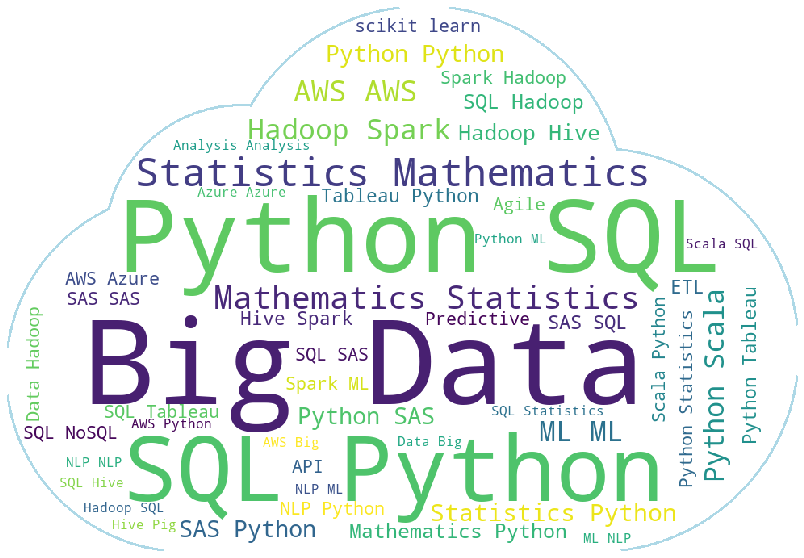

In [6]:
# extract job skills as list of strings
cloud_words = clean_data['job_skills'].astype(str).tolist()
cloud_words2 = ' '.join(cloud_words)

# define WordCloud
cloud = WordCloud(width = 1200, height = 800, background_color='white', mask=cloud_mask, contour_width=3, contour_color='lightblue', max_words=50)
cloud.generate(text=cloud_words2)

cloud.to_file("word-cloud.png")

# plot the figure and show
plt.figure(figsize = (15, 10), facecolor = None) 
plt.imshow(cloud)
plt.axis('off')
#plt.tight_layout(pad = 0)
plt.show()
